In [185]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import func, and_, distinct

from models import Date, Artist, Track, Chart, Link
from utils import db_connect, get_or_create
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [298]:
Base = declarative_base()
session = db_connect(Base)

In [32]:
query = session.query(
    Chart.position, Track.title, Artist.name, Chart.streams, Date.date
).join(
    Track, Artist, Date
).filter(
    Chart.type=='top200', Date.date==datetime.strptime('2017-04-01', '%Y-%m-%d')
)

In [33]:
df = pd.read_sql(query.statement, query.session.bind).set_index('date')

In [34]:
df.head()

,position,title,name,streams
date,,,,
2017-04-01,1,Galway Girl,Ed Sheeran,634224
2017-04-01,2,Shape of You,Ed Sheeran,584619
2017-04-01,3,Passionfruit,Drake,534915
2017-04-01,4,Symphony (feat. Zara Larsson),Clean Bandit,446952
2017-04-01,5,Castle on the Hill,Ed Sheeran,380551


In [153]:
query = session.query(
    Track.title, 
    Artist.name, 
    func.sum(Chart.streams).label('total_streams'), 
    func.count(Chart.id).label('days'),
    func.avg(Chart.position).label('average_position')
).join(
    Chart, Artist, Date
).filter(
    Chart.type=='top200', Date.month==4
).group_by(
    Track
)

In [154]:
df = pd.read_sql(query.statement, query.session.bind).set_index('total_streams').sort_index(ascending=False)

In [155]:
df.head(n=10)

,title,name,days,average_position
total_streams,,,,
8544566.0,Galway Girl,Ed Sheeran,17,1.1176
8161586.0,Shape of You,Ed Sheeran,17,2.1765
7774708.0,Passionfruit,Drake,17,3.4706
5705100.0,Something Just Like This,The Chainsmokers,17,5.9412
5449389.0,Symphony,Clean Bandit,12,2.9167
5371091.0,It Ain't Me (with Selena Gomez),Kygo,17,7.1176
5342920.0,Stay (with Alessia Cara),Zedd,17,7.4706
5284360.0,Castle on the Hill,Ed Sheeran,17,8.7059
4948523.0,Slide,Calvin Harris,17,10.8824


In [159]:
query = session.query(
    Track.title, 
    Artist.name, 
    func.sum(Chart.streams).label('total_streams'), 
    func.count(Chart.id).label('days'),
    func.avg(Chart.position).label('average_position'),
    func.min(Chart.position).label('min_position'),
    func.max(Chart.position).label('max_position'),

).join(
    Chart, Artist, Date
).filter(
    Chart.type=='top200'
).group_by(
    Track
)

In [160]:
df = pd.read_sql(query.statement, query.session.bind).set_index('total_streams').sort_index(ascending=False)

In [161]:
df.head(n=10)

,title,name,days,average_position,min_position,max_position
total_streams,,,,,,
76601224.0,Shape of You,Ed Sheeran,100,1.5400,1,3
53559544.0,Castle on the Hill,Ed Sheeran,100,3.9000,2,15
33332556.0,You Don't Know Me,Jax Jones,100,10.0400,3,32
32544720.0,Galway Girl,Ed Sheeran,46,1.1304,1,2
29022515.0,Paris,The Chainsmokers,95,14.2526,4,44
26316355.0,Touch,Little Mix,100,19.3200,4,57
23813776.0,Call On Me - Ryan Riback Extended Remix,Starley,100,22.3400,6,60
23200305.0,September Song,JP Cooper,100,22.3700,7,54
23178261.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,100,26.6900,3,65


In [144]:
query = session.query(
    Artist.name, 
    func.count(distinct(Track.id)).label('tracks'),
    func.sum(Chart.streams).label('total_streams'), 
    func.count(Chart.id).label('entries'),
    func.avg(Chart.position).label('average_position')
).join(
    Track, Chart
).filter(
    Chart.type=='top200'
).group_by(
    Artist
)

In [145]:
df = pd.read_sql(query.statement, query.session.bind).set_index('name').sort_values(
    by='total_streams', ascending=False)

In [146]:
df.head(n=10)

,tracks,total_streams,entries,average_position
name,,,,
Ed Sheeran,39,394755234.0,1705,67.9642
Drake,28,153088091.0,1154,75.3397
The Chainsmokers,16,77507304.0,466,62.5751
Stormzy,18,59767676.0,568,92.4665
Little Mix,6,50725476.0,340,59.5941
The Weeknd,9,41303612.0,378,83.1561
Clean Bandit,4,35582987.0,137,28.9270
Jax Jones,2,35409431.0,152,60.7171
Rag'n'Bone Man,5,34091574.0,191,45.4712


In [147]:
query = session.query(
    Track.title, 
    Artist.name, 
    func.sum(Chart.streams).label('total_streams'), 
    func.count(Chart.id).label('entries'),
    func.avg(Chart.position).label('average_position')
).join(
    Chart, Artist, Date
).filter(
    Chart.type=='top200'
).group_by(
    Track
)

In [148]:
df = pd.read_sql(query.statement, query.session.bind).set_index('total_streams').sort_index(ascending=False)

In [149]:
df.head(n=10)

,title,name,entries,average_position
total_streams,,,,
76601224.0,Shape of You,Ed Sheeran,100,1.5400
53559544.0,Castle on the Hill,Ed Sheeran,100,3.9000
33332556.0,You Don't Know Me,Jax Jones,100,10.0400
32544720.0,Galway Girl,Ed Sheeran,46,1.1304
29022515.0,Paris,The Chainsmokers,95,14.2526
26316355.0,Touch,Little Mix,100,19.3200
23813776.0,Call On Me - Ryan Riback Extended Remix,Starley,100,22.3400
23200305.0,September Song,JP Cooper,100,22.3700
23178261.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,100,26.6900


In [170]:
data = session.query(
    Date.date,
    Chart.position 
).join(
    Chart, Track
).filter(
    Chart.type=='top200', Artist.name=='Ed Sheeran', Track.title=='Shape of You'
).all()

In [176]:
dates, positions = zip(*data)

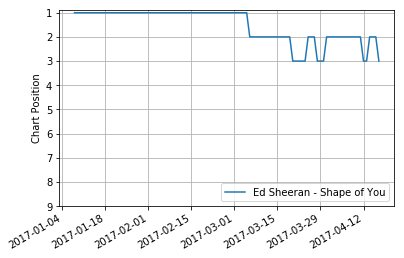

In [201]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dates, positions, label='Ed Sheeran - Shape of You')
ax.grid()
ax.set_ylabel('Chart Position')
ax.legend(loc=4)

plt.yticks(np.arange(1, 10, 1))
plt.gca().invert_yaxis()
fig.autofmt_xdate()
#ax.xaxis.tick_top()
plt.show()

In [ ]:
# get a list of songs

In [247]:
query = session.query(
    Track.title,
    func.sum(Chart.streams).label('total_streams')
).join(
    Chart, Artist
).filter(
    Chart.type=='top200', Artist.name=='Ed Sheeran'
).group_by(
    Track
)

In [250]:
df = pd.read_sql(query.statement, query.session.bind).sort_values(by='total_streams', ascending=False)

In [252]:
df.head(n=10)

,title,total_streams
1,Shape of You,76601224.0
2,Castle on the Hill,53559544.0
0,Galway Girl,32544720.0
6,New Man,18061517.0
3,Perfect,16922527.0
5,Happier,16448411.0
10,How Would You Feel (Paean),16259763.0
4,What Do I Know?,15912475.0
8,Dive,14537832.0
7,Barcelona,13781712.0


In [255]:
titles = df['title'][:10].values

In [256]:
def get_date_position_data(artist, track_title, chart_type):
    data = session.query(
        Date.date,
        Chart.position 
    ).join(
        Chart, Track
    ).filter(
        Chart.type==chart_type, Artist.name==artist, Track.title==track_title
    ).all()
    return zip(*data)

In [260]:
track_data = {}
for title in titles:
    dates, positions = get_date_position_data('Ed Sheeran', title, 'top200')
    track_data[title] = [dates, positions]

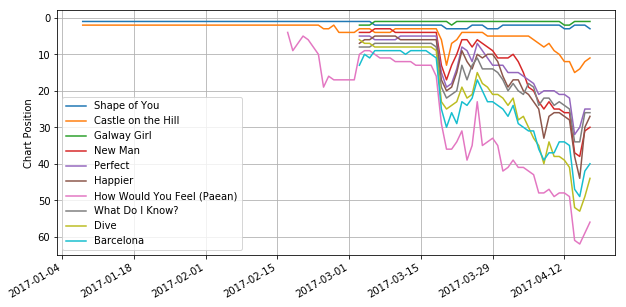

In [270]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for title in titles:
    dates, positions = track_data[title]
    ax.plot(dates, positions, label=title)
ax.grid()
ax.set_ylabel('Chart Position')
ax.legend(loc=3)

plt.gca().invert_yaxis()
fig.autofmt_xdate()
#ax.xaxis.tick_top()
plt.show()

In [274]:
query = session.query(
    Track.title, 
    Artist.name, 
    func.sum(Chart.streams).label('total_streams'), 
    func.count(Chart.id).label('entries'),
    func.avg(Chart.position).label('average_position')
).join(
    Chart, Artist, Date
).filter(
    Chart.type=='top200'
).group_by(
    Track
)

In [275]:
df = pd.read_sql(query.statement, query.session.bind).set_index('total_streams').sort_index(ascending=False)

In [277]:
df.head(n=10)

,title,name,entries,average_position
total_streams,,,,
76601224.0,Shape of You,Ed Sheeran,100,1.5400
53559544.0,Castle on the Hill,Ed Sheeran,100,3.9000
33332556.0,You Don't Know Me,Jax Jones,100,10.0400
32544720.0,Galway Girl,Ed Sheeran,46,1.1304
29022515.0,Paris,The Chainsmokers,95,14.2526
26316355.0,Touch,Little Mix,100,19.3200
23813776.0,Call On Me - Ryan Riback Extended Remix,Starley,100,22.3400
23200305.0,September Song,JP Cooper,100,22.3700
23178261.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,100,26.6900


In [293]:
song_artist = df[['title', 'name']].values[:10]

In [307]:
track_data = {}
for title, artist in song_artist:
    dates, positions = get_date_position_data(artist, title, 'top200')
    key = title+' - '+artist
    track_data[key] = [dates, positions]

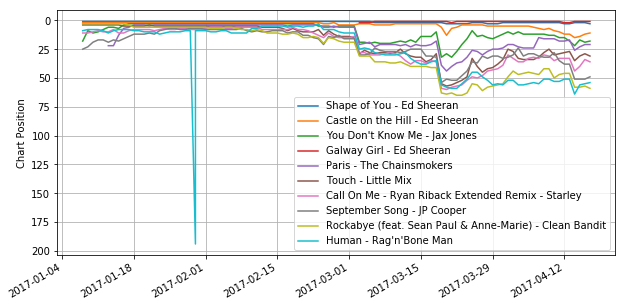

In [315]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for title, artist in song_artist:
    key = title+' - '+artist
    dates, positions = track_data[key]
    ax.plot(dates, positions, label=key)
ax.grid()
ax.set_ylabel('Chart Position')
ax.legend(loc=0)

plt.gca().invert_yaxis()
fig.autofmt_xdate()
#ax.xaxis.tick_top()
plt.show()